In [6]:
! pip install kaggle

# IMPORTING LIBRARIES

In [7]:
from zipfile import ZipFile

# importing the dependancies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
# configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# IMPORTING FACE MASK DATASET

In [9]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 159M/163M [00:04<00:00, 42.4MB/s]
100% 163M/163M [00:04<00:00, 36.9MB/s]


In [10]:
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The Dataset is extracted ')

The Dataset is extracted 


In [11]:
# see the extracted content of zip file
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1050.jpg', 'with_mask_533.jpg', 'with_mask_2820.jpg', 'with_mask_3504.jpg', 'with_mask_130.jpg']
['with_mask_1868.jpg', 'with_mask_1383.jpg', 'with_mask_1975.jpg', 'with_mask_3572.jpg', 'with_mask_3719.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3211.jpg', 'without_mask_2282.jpg', 'without_mask_3004.jpg', 'without_mask_3057.jpg', 'without_mask_1426.jpg']
['without_mask_2269.jpg', 'without_mask_2993.jpg', 'without_mask_2544.jpg', 'without_mask_3264.jpg', 'without_mask_3035.jpg']


In [14]:
print("Number of With Mask images :",len(with_mask_files))
print("Number of Without Mask images :",len(without_mask_files))

Number of With Mask images : 3725
Number of Without Mask images : 3828


In [15]:
#create labels for images
# creating labels for 2 class images like 0 and 1

# with mask --> 1
# withou mask --> 0

with_mask_label = [1]* len(with_mask_files)
without_mask_label = [0]* len(without_mask_files)
print("with_mask_label",with_mask_label[0:5])
print("without_mask_label",without_mask_label[0:5])


with_mask_label [1, 1, 1, 1, 1]
without_mask_label [0, 0, 0, 0, 0]


In [16]:
#combine the labels

labels = with_mask_label + without_mask_label

print(len(labels))


7553


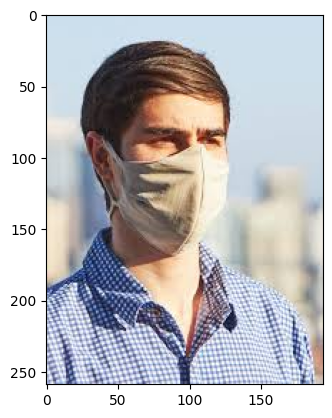

In [17]:
#displaying images with mask

img =mpimg.imread('/content/data/with_mask/with_mask_2820.jpg')
imgplot =plt.imshow(img)
plt.show()

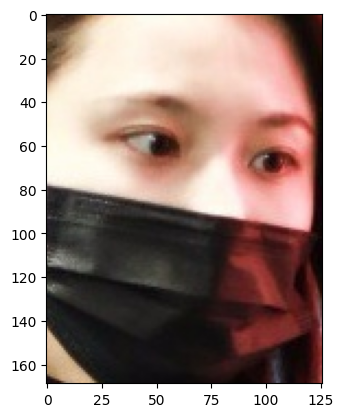

In [18]:
img1 =mpimg.imread('/content/data/with_mask/with_mask_1383.jpg')
imgplot =plt.imshow(img1)
plt.show()

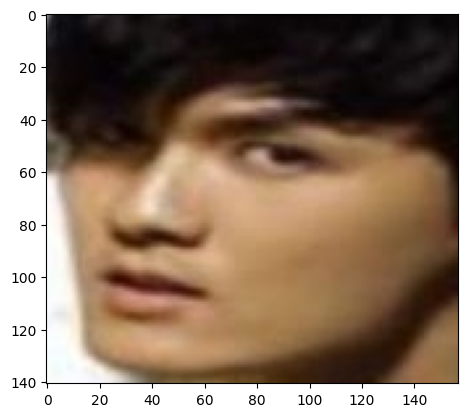

In [19]:
# displaying images for without mask
img2 =mpimg.imread('/content/data/without_mask/without_mask_3264.jpg')
imgplot =plt.imshow(img2)
plt.show()

In [20]:
# we can see all the images are with different sizes


# IMAGE PROCESSING
  - resize the images
  - convert the images to numpy arrays

In [21]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_files in with_mask_files:
  image = Image.open(with_mask_path + img_files )
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_files in without_mask_files:
  image = Image.open(without_mask_path + img_files )
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
print(type(data))
print(len(data))

<class 'list'>
7553


array([[[ 47,  63, 103],
        [ 43,  65, 103],
        [ 46,  66, 105],
        ...,
        [100, 101, 110],
        [ 99, 101, 108],
        [ 95, 105, 106]],

       [[ 46,  64, 112],
        [ 39,  63, 109],
        [ 42,  64, 111],
        ...,
        [103, 104, 108],
        [ 96, 103, 107],
        [ 99, 103, 110]],

       [[ 36,  66, 113],
        [ 36,  63, 102],
        [ 44,  65, 104],
        ...,
        [103,  99, 107],
        [ 97, 101, 105],
        [104, 101, 107]],

       ...,

       [[116, 114, 113],
        [122, 115, 117],
        [119, 113, 115],
        ...,
        [ 84,  69,  66],
        [ 98,  78,  80],
        [114,  88,  96]],

       [[122, 112, 108],
        [116, 114, 109],
        [114, 114, 110],
        ...,
        [142, 119, 108],
        [147, 122, 114],
        [147, 123, 110]],

       [[124, 111, 104],
        [120, 115, 107],
        [120, 115, 110],
        ...,
        [151, 125, 110],
        [152, 124, 116],
        [150, 122, 115]]], dtype=uint8)
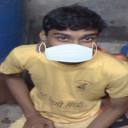

In [23]:
data[0]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

# CONVERT THE IMAGES LIST AND LABELS IN NUMPY ARRAY

In [26]:
print("="* 100)
print("before Type :", type(data))
print("Before type Labels :", type(labels))

X = np.array(data)
y = np.array(labels)
print("="* 100)
print("X type :",type(X))
print("y type :",type(y))

print("="* 100)
print("X shape :",X.shape)
print("y shape :",y.shape)


before Type : <class 'list'>
Before type Labels : <class 'list'>
X type : <class 'numpy.ndarray'>
y type : <class 'numpy.ndarray'>
X shape : (7553, 128, 128, 3)
y shape : (7553,)


# CONVERT THE DATA IN TRAIN TEST SPLIT

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
print("="* 100)
print("Before Split")
print("X shape :",X.shape)
print("y shape :",y.shape)
print("="* 100)
print("after split")
print("X train :",X_train.shape)
print("X test :",X_test.shape)
print("="* 100)
print("y train :",y_train.shape)
print("y test :",y_test.shape)
print("="* 100)

Before Split
X shape : (7553, 128, 128, 3)
y shape : (7553,)
after split
X train : (6042, 128, 128, 3)
X test : (1511, 128, 128, 3)
y train : (6042,)
y test : (1511,)


# SCALING OF DATA
 - all the images pixel values are between 0 to 255
 - scalling will make the values 0 to 1 it makes easy to do the calculation for the model
 - all the White color represent as 255
 - all the black color represent as 0


Before Scalling


array([[[183, 179, 176],
        [182, 179, 176],
        [180, 181, 176],
        ...,
        [202, 201, 196],
        [200, 200, 195],
        [199, 198, 194]],

       [[183, 179, 176],
        [182, 179, 176],
        [180, 181, 176],
        ...,
        [201, 199, 194],
        [198, 198, 193],
        [197, 196, 192]],

       [[183, 179, 176],
        [182, 179, 176],
        [180, 181, 176],
        ...,
        [199, 196, 191],
        [197, 195, 190],
        [195, 193, 189]],

       ...,

       [[138, 132, 132],
        [138, 132, 132],
        [139, 133, 133],
        ...,
        [149, 139, 140],
        [149, 139, 140],
        [148, 138, 139]],

       [[138, 132, 132],
        [138, 132, 132],
        [139, 133, 133],
        ...,
        [149, 139, 140],
        [149, 139, 140],
        [148, 138, 139]],

       [[139, 133, 133],
        [139, 133, 133],
        [140, 134, 134],
        ...,
        [150, 140, 141],
        [149, 139, 140],
        [147, 137, 138]]], dtype=uint8)
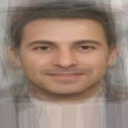

In [29]:
print("Before Scalling")
X_train[0]

In [30]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [31]:
print("After scalling")
X_train_scaled[0]

After scalling


array([[[0.71764706, 0.70196078, 0.69019608],
        [0.71372549, 0.70196078, 0.69019608],
        [0.70588235, 0.70980392, 0.69019608],
        ...,
        [0.79215686, 0.78823529, 0.76862745],
        [0.78431373, 0.78431373, 0.76470588],
        [0.78039216, 0.77647059, 0.76078431]],

       [[0.71764706, 0.70196078, 0.69019608],
        [0.71372549, 0.70196078, 0.69019608],
        [0.70588235, 0.70980392, 0.69019608],
        ...,
        [0.78823529, 0.78039216, 0.76078431],
        [0.77647059, 0.77647059, 0.75686275],
        [0.77254902, 0.76862745, 0.75294118]],

       [[0.71764706, 0.70196078, 0.69019608],
        [0.71372549, 0.70196078, 0.69019608],
        [0.70588235, 0.70980392, 0.69019608],
        ...,
        [0.78039216, 0.76862745, 0.74901961],
        [0.77254902, 0.76470588, 0.74509804],
        [0.76470588, 0.75686275, 0.74117647]],

       ...,

       [[0.54117647, 0.51764706, 0.51764706],
        [0.54117647, 0.51764706, 0.51764706],
        [0.54509804, 0

# BUILDING A CONVOLUTIONAL NEURAL NETWORK (CNN)

In [49]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

In [50]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


# flatten the arrays in to vector

model.add(keras.layers.Flatten())

# Adding the ANN layers

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))



# COMPILE THE NEURAL NETWORK

In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [52]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
152/152 [==============================] - 6s 29ms/step - loss: 0.7353 - acc: 0.5373 - val_loss: 0.6010 - val_acc: 0.6493
Epoch 2/20
152/152 [==============================] - 3s 21ms/step - loss: 0.4341 - acc: 0.8090 - val_loss: 0.2838 - val_acc: 0.8850
Epoch 3/20
152/152 [==============================] - 3s 21ms/step - loss: 0.3277 - acc: 0.8771 - val_loss: 0.2858 - val_acc: 0.8817
Epoch 4/20
152/152 [==============================] - 3s 19ms/step - loss: 0.2953 - acc: 0.8955 - val_loss: 0.2329 - val_acc: 0.9057
Epoch 5/20
152/152 [==============================] - 3s 20ms/step - loss: 0.2302 - acc: 0.9114 - val_loss: 0.2041 - val_acc: 0.9289
Epoch 6/20
152/152 [==============================] - 3s 21ms/step - loss: 0.2035 - acc: 0.9247 - val_loss: 0.2339 - val_acc: 0.9074
Epoch 7/20
152/152 [==============================] - 3s 20ms/step - loss: 0.1760 - acc: 0.9379 - val_loss: 0.2123 - val_acc: 0.9247
Epoch 8/20
152/152 [==============================] - 3s 20ms/step - 

# MODEL EVALUATION

In [53]:
loss , accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy : ", accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.3083 - acc: 0.9246
Test Accuracy :  0.9245532751083374


# PLOT THE ACCURACY AND LOSS

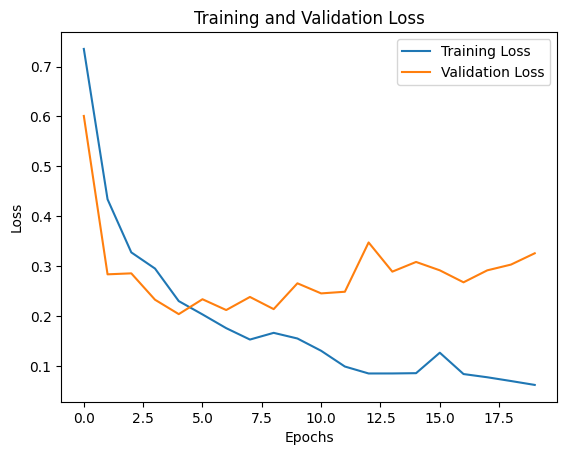

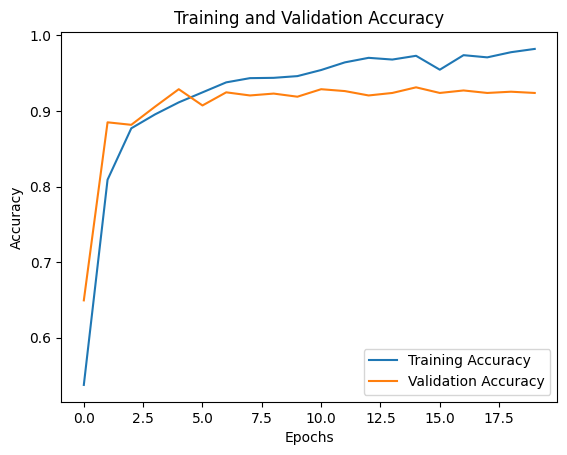

In [54]:
# Plot the loss values
h = history
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(h.history['acc'], label='Training Accuracy')
plt.plot(h.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# PREDECTIVE SYSTEM

path of the image to be predicted/content/face_mask2.jpg


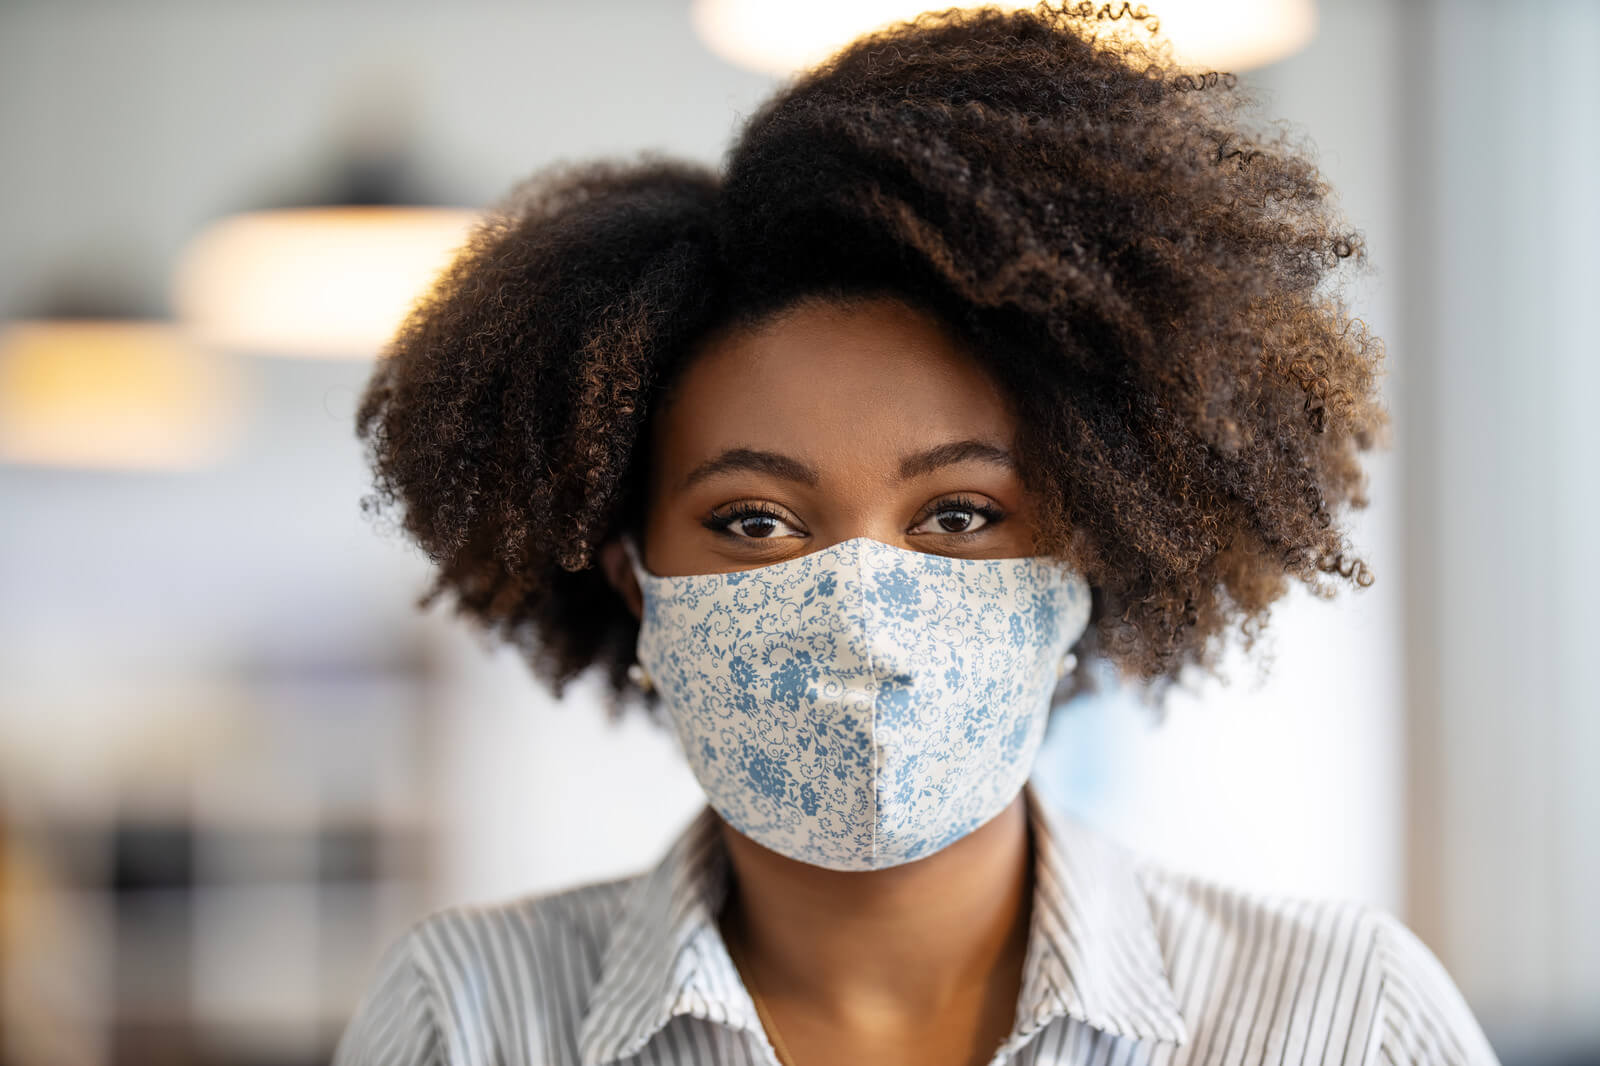

1/1 [==============================] - 0s 27ms/step
[[0.17205465 0.77828497]]
1
The person in the image wearing the mask 


In [57]:
input_image_path = input("path of the image to be predicted")

# we can get the image and convert it into numpy array
#pilo will read the image but it cant be displayed so we use cv2
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128 , 128) )

input_image_scaled = input_image_resized/255

input_image_reshape = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction =model.predict(input_image_reshape)

print(input_prediction)

input_predication_label = np.argmax(input_prediction)

print(input_predication_label)

if input_predication_label == 1:
  print("The person in the image wearing the mask ")
else:
  print("The person in the image is not wearing the mask")


path of the image to be predicted/content/face_mask7.jpg


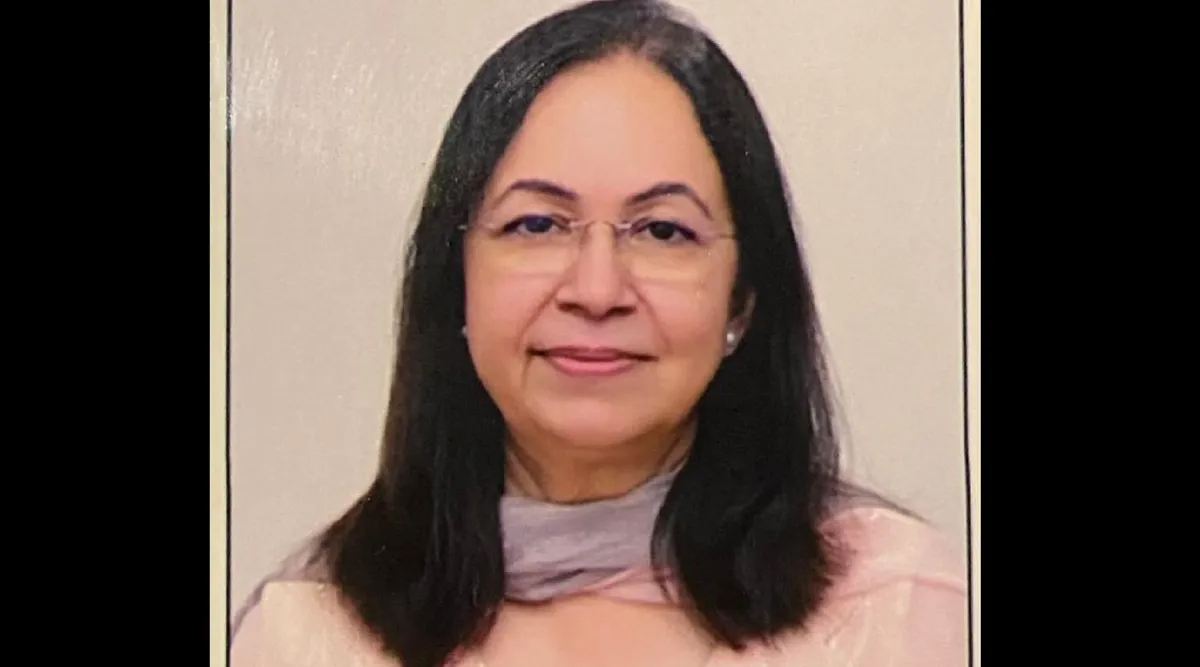

1/1 [==============================] - 0s 27ms/step
[[3.5151797e-06 9.9997127e-01]]
1
NO MASK


In [71]:
input_image_path = input("path of the image to be predicted")

# we can get the image and convert it into numpy array
#pilo will read the image but it cant be displayed so we use cv2
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128 , 128) )

input_image_scaled = input_image_resized/255

input_image_reshape = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction =model.predict(input_image_reshape)

print(input_prediction)

input_predication_label = np.argmax(input_prediction)

print(input_predication_label)

if input_predication_label == 0:
  print("MASK")
else:
  print("NO MASK")
